In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')

In [14]:
X = df.drop(['Unnamed: 0','Sales'],axis=1)

In [15]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y = df['Sales']

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
polynomial_convertor = PolynomialFeatures(degree=2,include_bias=False)

In [19]:
polynomial_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [20]:
poly_features = polynomial_convertor.transform(X)

In [21]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [22]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [23]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [24]:
polynomial_convertor.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state = 101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
test_predictions = model.predict(X_test)

In [31]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
MAE = mean_absolute_error(y_test,test_predictions)

In [34]:
MSE = mean_squared_error(y_test,test_predictions)

In [35]:
MAE

0.48967980448037773

In [36]:
MSE

0.44175055104036803

In [37]:
RMSE = np.sqrt(MSE)

In [38]:
RMSE

0.6646431757269219

In [39]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [40]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [41]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [42]:
# create the different order poly
# split poly feate train/test
# fit on train
# store/save the rmse for BOTH the train and test
#PLOT the results(error vs poly order)

In [44]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,10):#just for tutorial purposes
    poly_converter = PolynomialFeatures(degree = d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state = 101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [45]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902066,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.421422254798897,
 0.14195188180763446,
 0.16652823106830295]

In [46]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269219,
 0.5803286825156331,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.4044184284955,
 4449.598881134619,
 95891.23970649147]

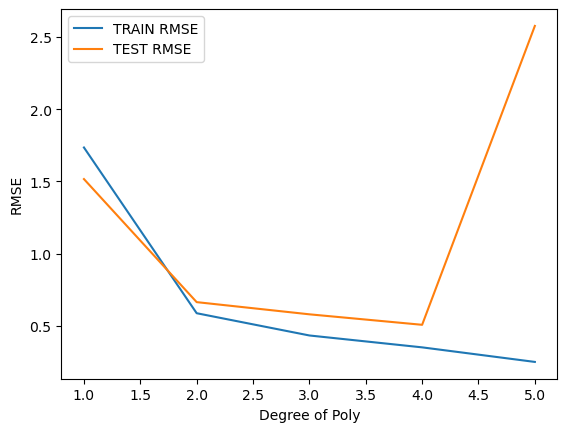

In [47]:
plt.plot(range(1,6),train_rmse_errors[:5],label= 'TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [48]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [49]:
final_model = LinearRegression()

In [50]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [51]:
from joblib import dump,load

In [52]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [53]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [54]:
loaded_converter = load('final_converter.joblib')

In [56]:
loaded_model = load('final_poly_model.joblib')

In [57]:
campaign = [[149,22,12]]

In [62]:
transformed_data = loaded_converter.fit_transform(campaign)

In [63]:
loaded_model.predict(transformed_data)

array([14.64501014])